# Exercício 1

Exercício com data de entrega para 21 de setembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [26]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

<img src="Figuras/PA1-1.png">

# Solução

## Esforços Solicitantes

Na seção $S$, vista pelo lado direito, temos os seguintes esforços solicitantes:

In [27]:
N = -4000
Vy = 9000
Vz = 13000
Tx = 0
My = (13e3*400e-3/1e3)*1e6
Mz = (-9e3*400e-3/1e3)*1e6
display(Math('N = %d~kN' % (N/1e3)))
display(Math('|V_{y}| = %d~kN' % (Vy/1e3)))
display(Math('|V_{z}| = %d~kN' % (Vz/1e3)))
display(Math('T_{x} = %d' % Tx))
display(Math('M_{y} = %.2f~\\times 10^{6} N\\cdot mm' % (My/1e6)))
display(Math('M_{z} = %.2f~\\times 10^{6} N\\cdot mm' % (Mz/1e6)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Cálculo da Área Total

In [28]:
A = 150*75 - (150-13)*(75-26)
display(Math(r'A = %d~mm^{2}' % A))

<IPython.core.display.Math object>

## Momentos de Inércia Estáticos

\begin{equation*}
    I_{y} = \frac{13\times 49^{3}}{12} + 2\times \left[\frac{150\times 13^{3}}{12} + 150\times 13\times 31^{2}\right]
\end{equation*}

\begin{equation*}
    I_{z} = \frac{2\times 13\times 150^{3}}{12} + \frac{49\times 13^{3}}{12}
\end{equation*}

In [29]:
Iy = 13*(49**3)/12 + 2*(150*(13**3)/12 + 150*13*31**2)
display(Math(r'I_{y} = %.2f\times 10^{-6} mm^{4}' % (Iy/1e6)))
Iz = 2*13*(150**3)/12 + 49*(13**3)/12
display(Math(r'I_{z} = %.2f\times 10^{-6} mm^{4}' % (Iz/1e6)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Círculo de Mohr

In [30]:
def mohr(s_x,s_y,t_xy):
    if t_xy == 0:
        t_xy = 1e-10  # Evitar divisão por zero!
    z = np.linspace(0,360,360)
    r = np.sqrt((((s_x-s_y)/2)**2)+t_xy**2)
    s_med = ((s_x+s_y)/2)
    tg2tc = -(s_x-s_y)/(2*t_xy)
    tg2tp = -1/(tg2tc)
    tc = np.degrees(np.arctan(tg2tc)/2)
    tp = np.degrees(np.arctan(tg2tp)/2)
    x = s_med + r*np.cos(np.radians(z))
    y = r*np.sin(np.radians(z))
    a = ([s_x,s_x,s_y,s_y,s_x])
    b = ([0,t_xy,-t_xy,0,0])
    # Plot
    text = '\n'.join((
        r'$\sigma_{min} = %.1f~MPa$' % (s_med-r,),
        r'$\sigma_{max} = %.1f~MPa$' % (s_med+r,),
        r'$\tau_{max} = %.1f~MPa$' % (r,),
        r'$\theta_{p} = %.0f^{o}$' % (tp,),
        r'$\theta_{c} = %.0f^{o}$' % (tc,)
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.plot(a,b,x,y)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    plt.title("Círculo de Mohr")
    plt.text(s_med-1.6*r,r,text, fontsize=12, verticalalignment='top', bbox=props)
    plt.axis("equal")
    plt.show()

## Ponto $a$

### Tensão Normal $\sigma_{x}$

\begin{equation*}
    \sigma_{x} = \frac{N}{A} - \frac{M_{z}y}{I_{z}} + \frac{M_{y}z}{I_{y}}
\end{equation*}

In [31]:
sigma_xa = N/A - (Mz*(-75)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xa} = %.2f~MPa' % sigma_xa))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [32]:
sigma_ya = 0
display(Math(r'\sigma_{ya} = %d' % sigma_ya))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \tau = \frac{T}{2t\bar{A}} + \frac{V_{z}Q_{y}}{bI_{y}} + \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

Como no ponto $a$, $Q_{z} = 0$, $T = 0$ e, considerando o Estado Plano de Tensão no plano $xy$, fazemos $V_z = 0$, temos:

In [33]:
tau_xya = 0
display(Math(r'\tau_{xya} = %d' % tau_xya))

<IPython.core.display.Math object>

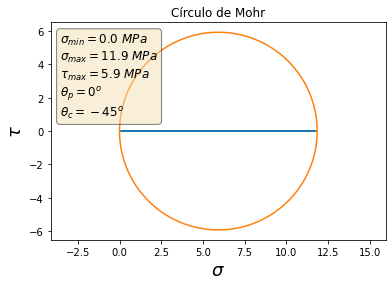

In [34]:
mohr(sigma_xa,sigma_ya,tau_xya)

## Ponto $b$

### Tensão Normal $\sigma_{x}$

In [35]:
sigma_xb = N/A - (Mz*(-15)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xb} = %.2f~MPa' % sigma_xb))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [36]:
sigma_yb = 0
display(Math(r'\sigma_{yb} = %d' % sigma_yb))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \bar{d}_{yb} = \frac{2\times 13\times 60\times \left(-30-15\right)}{2\times 13\times 60}
\end{equation*}

In [37]:
dyb = -2*13*60*45/(2*13*60)
display(Math(r'\bar{d}_{yb} = %.2f~mm' % dyb))

<IPython.core.display.Math object>

\begin{equation*}
    Q_{zb} = -\left(2\times 13\times 60\right)\times 45
\end{equation*}

In [38]:
Qzb = (2*13*60)*dyb
display(Math(r'Q_{zb} = %.2f~mm^{3}' % Qzb))

<IPython.core.display.Math object>

Como no ponto $b$ temos $T = 0$ e, considerando o Estado Plano de Tensão no plano $xy$, fazemos $V_z = 0$, temos:

\begin{equation*}
    \tau_{xy} = \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [39]:
tau_xyb = Vy*Qzb/(26*Iz)
display(Math(r'\tau_{xyb} = %.2f~MPa' % tau_xyb))

<IPython.core.display.Math object>

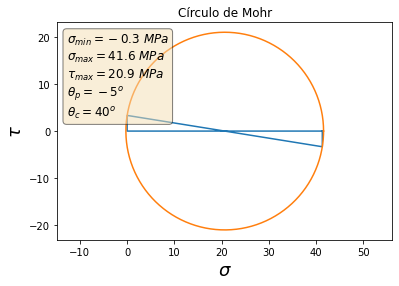

In [40]:
mohr(sigma_xb,sigma_yb,tau_xyb)

## Ponto $d$

### Tensão Normal $\sigma_{x}$

In [41]:
sigma_xd = N/A - (Mz*(15)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xd} = %.2f~MPa' % sigma_xd))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [42]:
sigma_yd = 0
display(Math(r'\sigma_{yd} = %d' % sigma_yd))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \bar{d}_{yb} = \frac{2\times 13\times 60\times \left(30+15\right)}{2\times 13\times 60}
\end{equation*}

In [43]:
dyd = 2*13*60*45/(2*13*60)
display(Math(r'\bar{d}_{yd} = %.2f~mm' % dyd))

<IPython.core.display.Math object>

\begin{equation*}
    Q_{zd} = \left(2\times 13\times 60\right)\times 45
\end{equation*}

In [44]:
Qzd = (2*13*60)*dyd
display(Math(r'Q_{zd} = %.2f~mm^{3}' % Qzd))

<IPython.core.display.Math object>

Como no ponto $d$ temos $T = 0$ e, considerando o Estado Plano de Tensão no plano $xy$, fazemos $V_z = 0$, temos:

\begin{equation*}
    \tau_{xy} = \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [45]:
tau_xyd = Vy*Qzd/(26*Iz)
display(Math(r'\tau_{xyd} = %.2f~MPa' % tau_xyd))

<IPython.core.display.Math object>

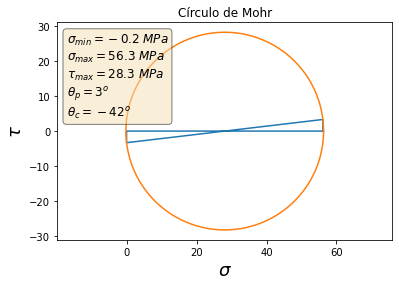

In [46]:
mohr(sigma_xd,sigma_yd,tau_xyd)

## Ponto $e$

### Tensão Normal $\sigma_{x}$

\begin{equation*}
    \sigma_{x} = \frac{N}{A} - \frac{M_{z}y}{I_{z}} + \frac{M_{y}z}{I_{y}}
\end{equation*}

In [47]:
sigma_xe = N/A - (Mz*(75)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xe} = %.2f~MPa' % sigma_xe))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [48]:
sigma_ye = 0
display(Math(r'\sigma_{ye} = %d' % sigma_ye))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

Como no ponto $e$, $Q_{z} = 0$, $T = 0$ e, considerando o Estado Plano de Tensão no plano $xy$, fazemos $V_z = 0$, temos:

In [49]:
tau_xye = 0
display(Math(r'\tau_{xye} = %d' % tau_xye))

<IPython.core.display.Math object>

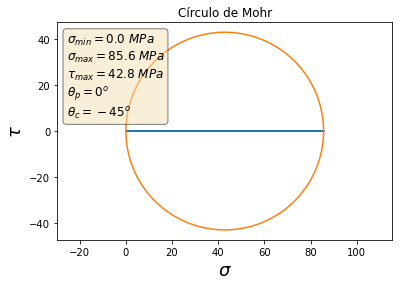

In [50]:
mohr(sigma_xe,sigma_ye,tau_xye)